In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv(r"C:\Users\matho\Downloads\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.drop(['customerID'],axis=1,inplace=True)

In [8]:
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(numerical_feature)

Count of Numerical feature: 4
{'SeniorCitizen', 'tenure', 'TotalCharges', 'MonthlyCharges'}


In [9]:
cat_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical features: {len(cat_feature)}')
print(cat_feature)

Count of Categorical features: 16
{'OnlineBackup', 'Dependents', 'StreamingTV', 'Contract', 'gender', 'DeviceProtection', 'InternetService', 'Churn', 'StreamingMovies', 'TechSupport', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'PhoneService', 'Partner', 'PaymentMethod'}


In [10]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

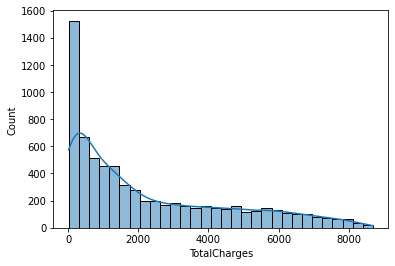

In [13]:
sns.histplot(df['TotalCharges'],kde=True,bins=30)

In [14]:
df['TotalCharges'].median()

1397.475

In [15]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median(),axis=0)

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64

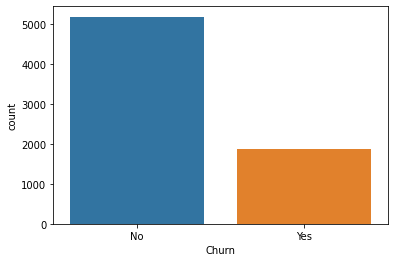

In [17]:
sns.countplot(data=df,x='Churn')
df['Churn'].value_counts()

In [18]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

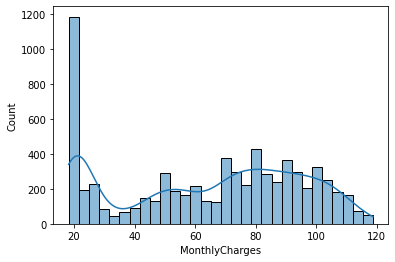

In [19]:
sns.histplot(df['MonthlyCharges'],kde=True,bins=30)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

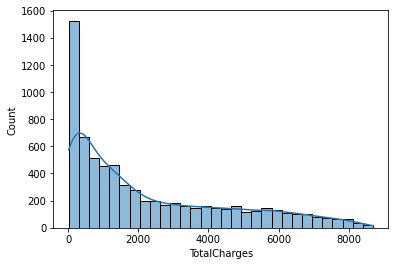

In [20]:
sns.histplot(df['TotalCharges'],kde=True,bins=30)

<AxesSubplot:xlabel='gender', ylabel='count'>

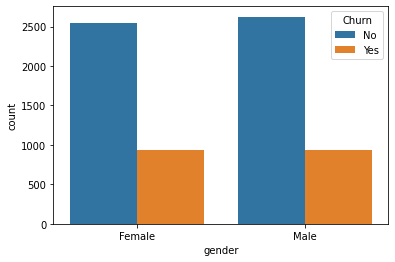

In [21]:
sns.countplot(x='gender',hue='Churn',data=df)

In [22]:
l1 = df.loc[df['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(df['Churn'])}")
print(df.Churn.value_counts())

Pecentage of Left: 0.2653698707936959
No     5174
Yes    1869
Name: Churn, dtype: int64


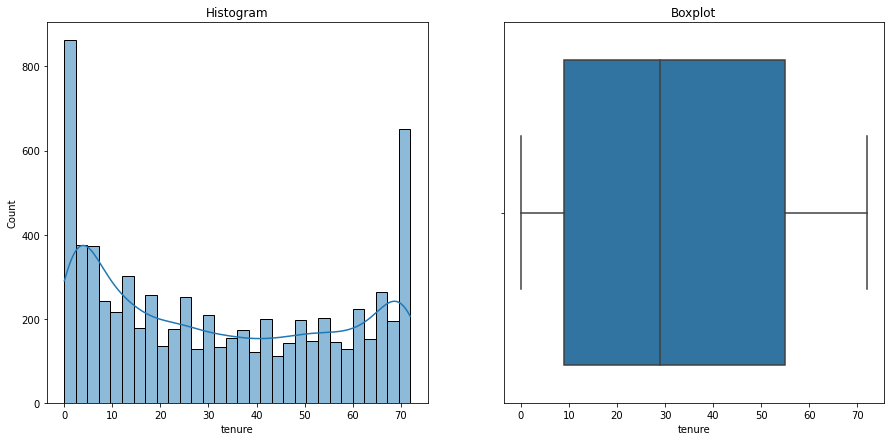

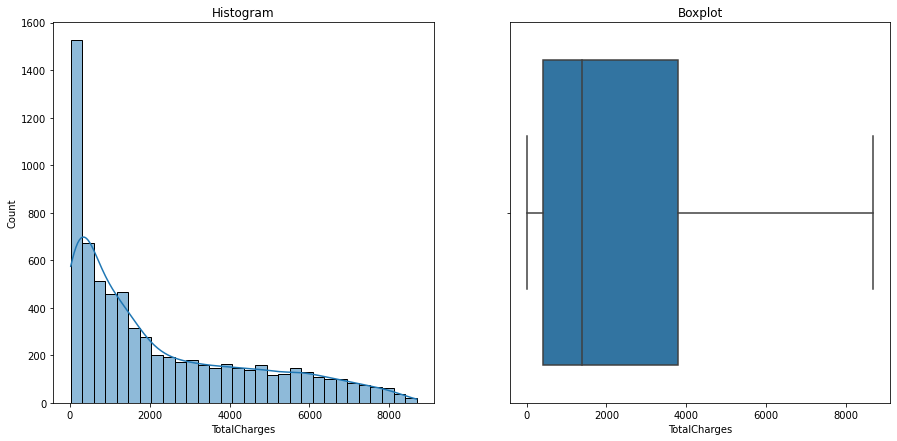

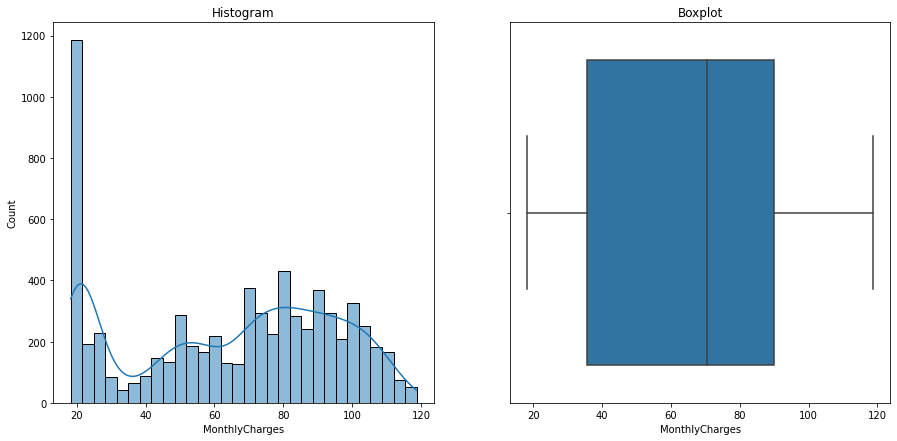

In [23]:
#plotting boxplot and histograms
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=feature, bins=30, kde=True)
        plt.title('Histogram')
    
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature])
        plt.title('Boxplot')
    
plt.show()

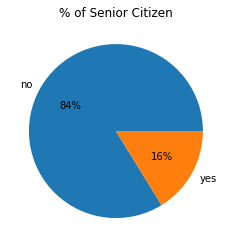

In [24]:
plt.title('% of Senior Citizen')
plt.pie(df['SeniorCitizen'].value_counts(),autopct='%.0f%%',labels=['no','yes'])
plt.show()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

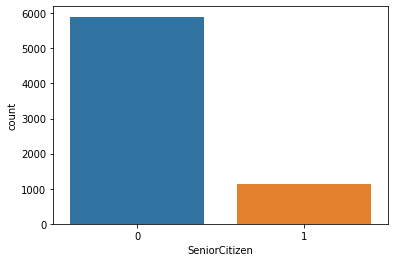

In [25]:
sns.countplot(x=df['SeniorCitizen'],data=df)

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


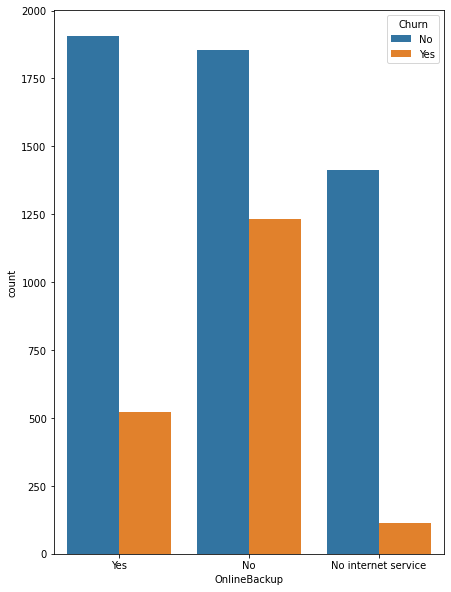

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


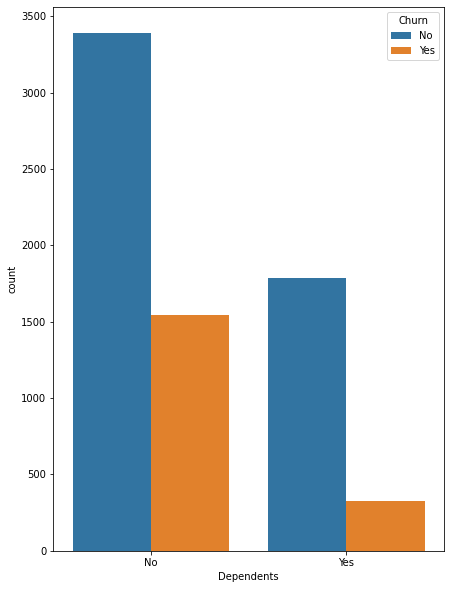

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


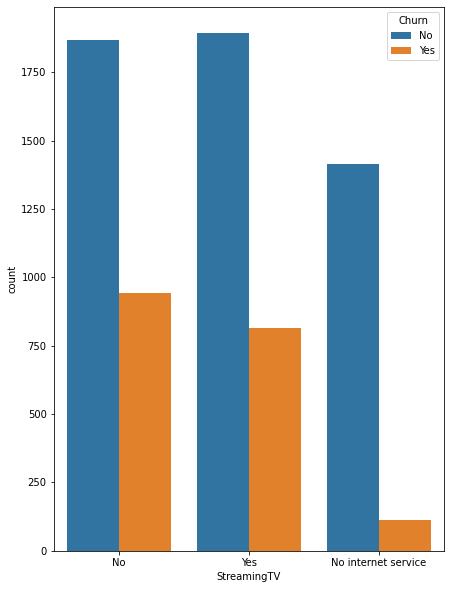

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


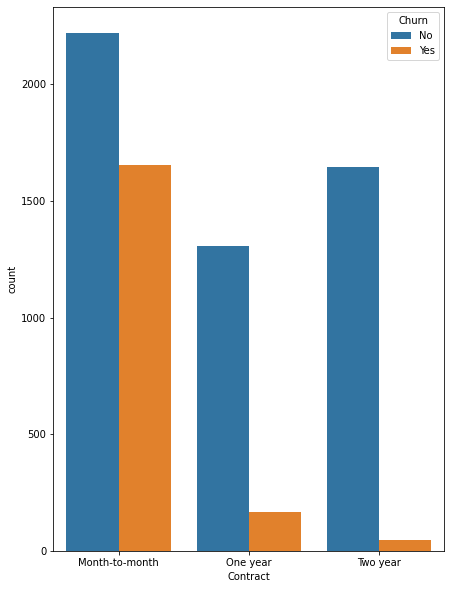

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


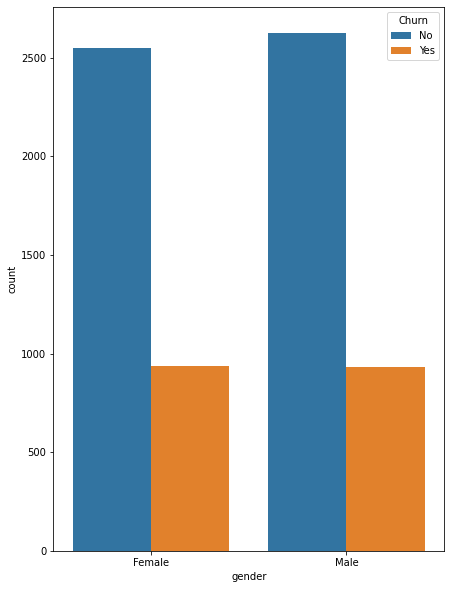

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


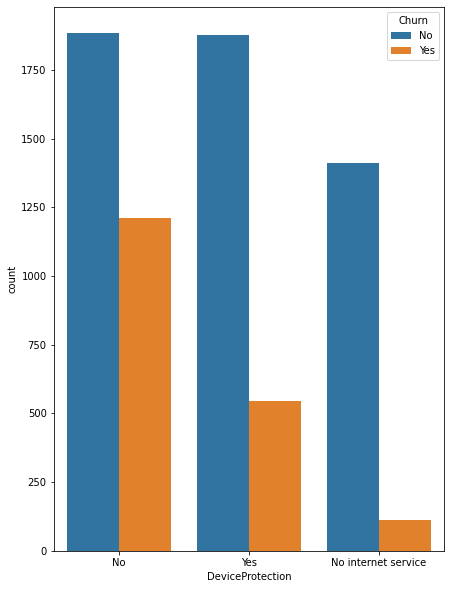

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


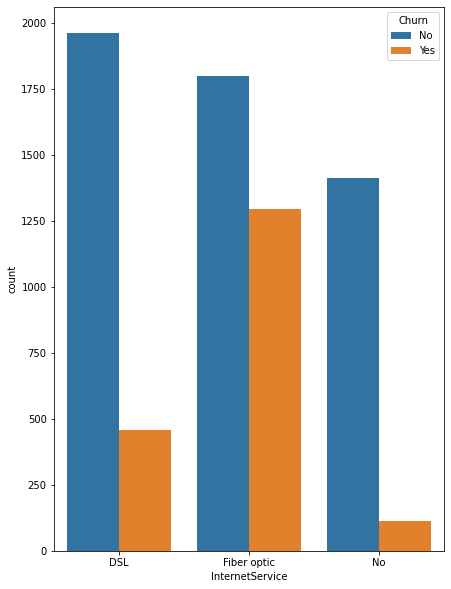

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


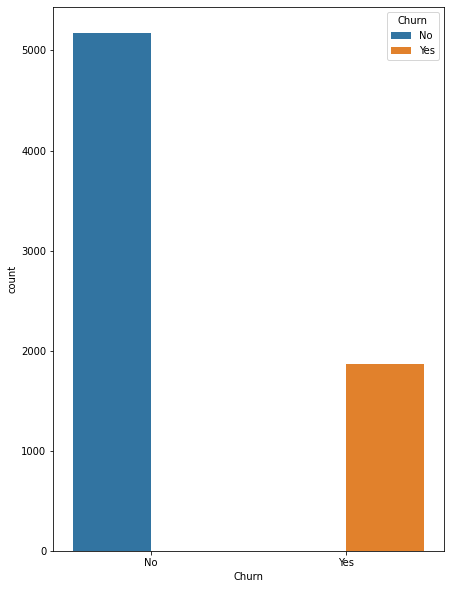

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


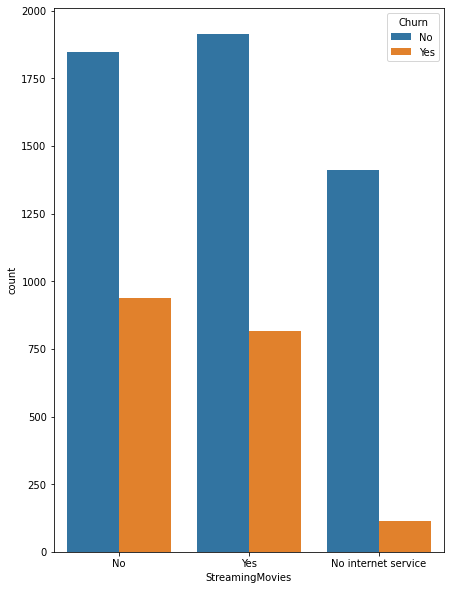

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


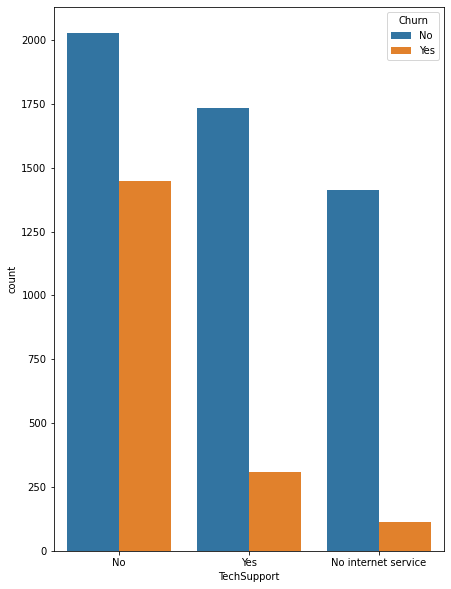

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


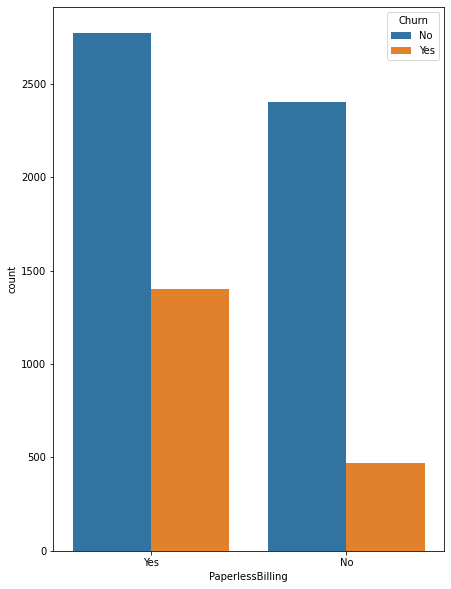

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


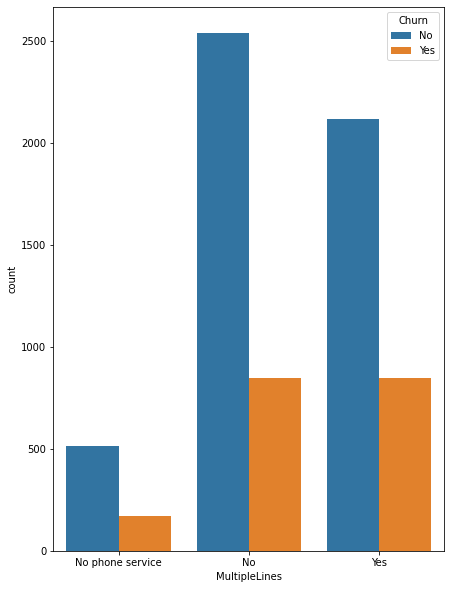

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


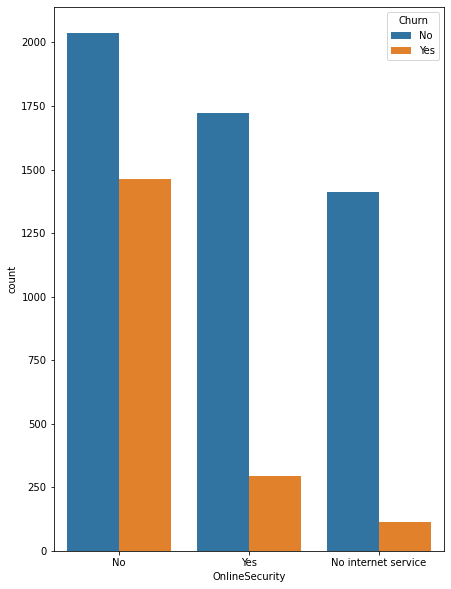

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


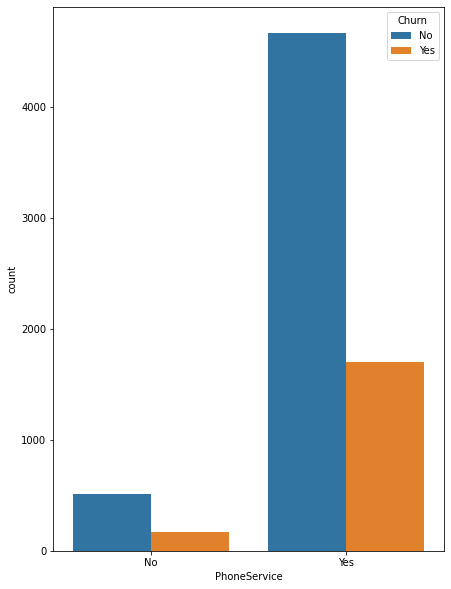

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


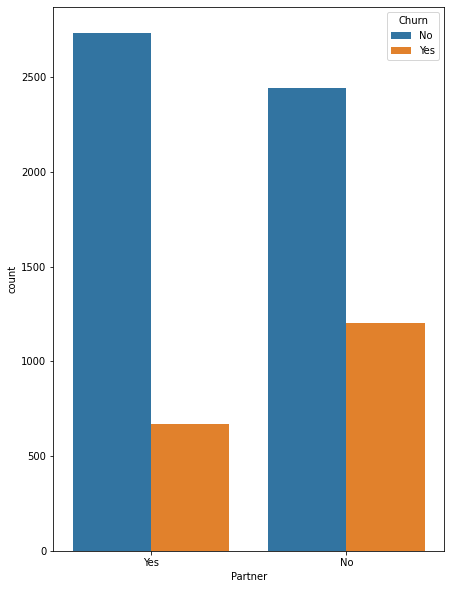

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


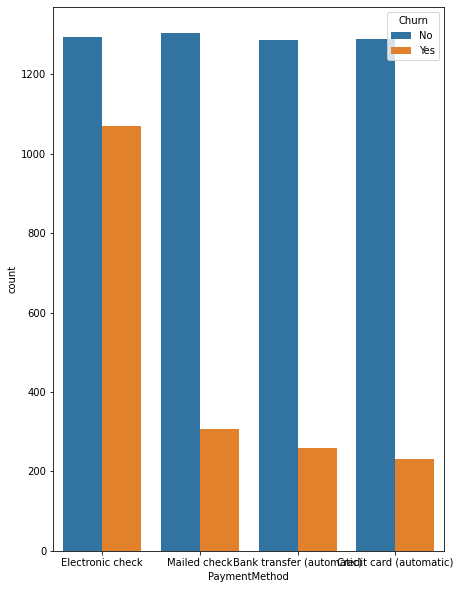

In [26]:
def categorical_count(data):
    plt.figure(figsize=(7,10))
    sns.countplot(df[data],hue='Churn',data=df)
    plt.show()

for feature in cat_feature:
        categorical_count(feature)


In [27]:
#encoding categorical values for modelling
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in cat_feature:
    df[feature] = encoder.fit_transform(df[feature])

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

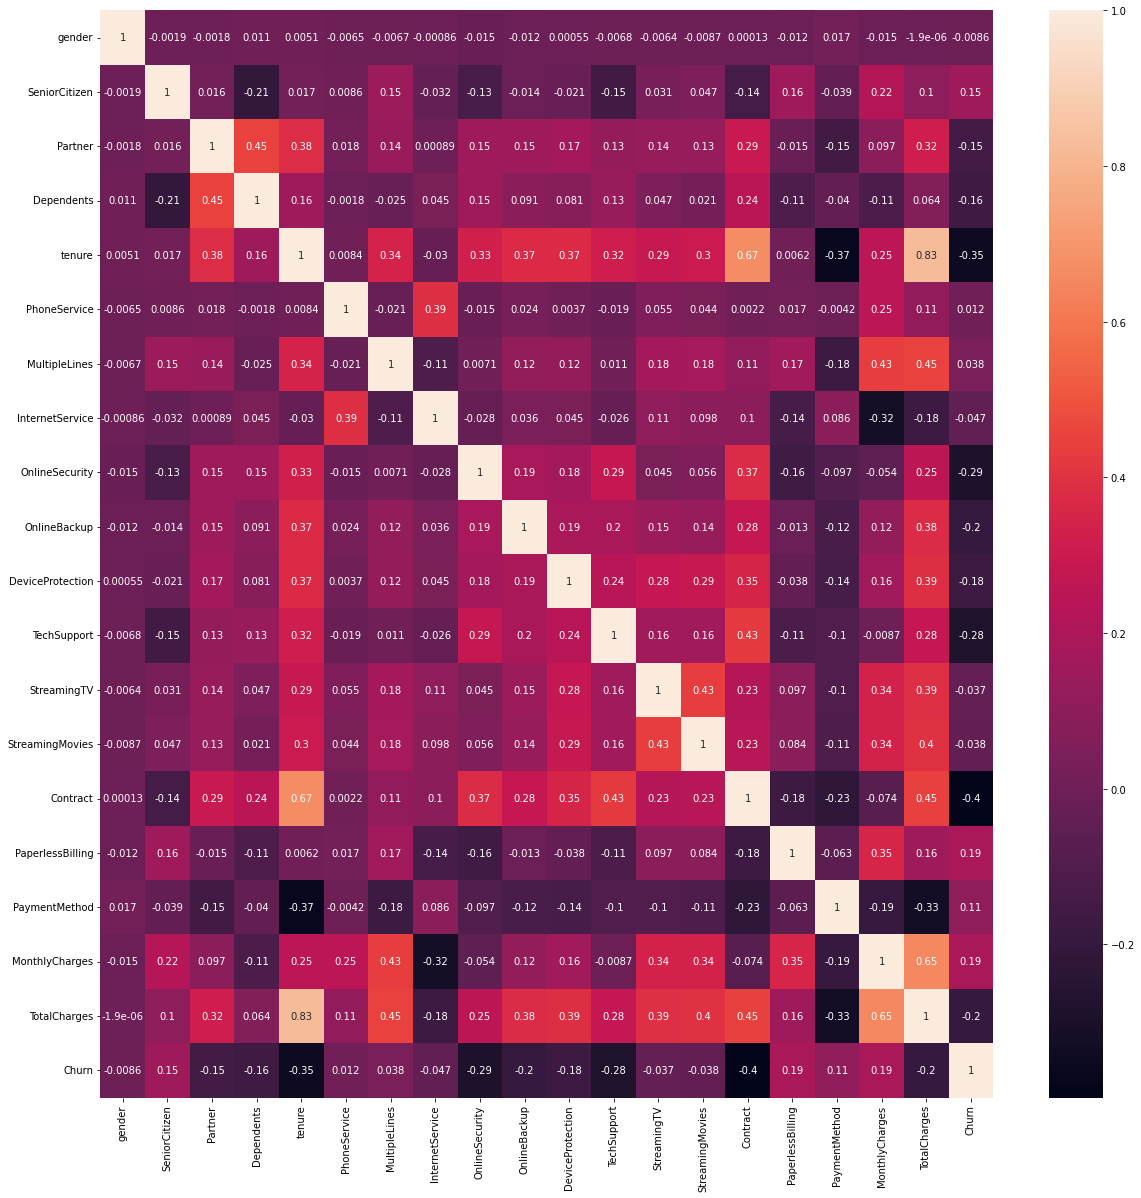

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [30]:
X = df.drop(columns='Churn')
y = df['Churn']

In [31]:
#selecting the 10 best features
from sklearn.feature_selection import SelectKBest

selection = SelectKBest()  
X = selection.fit_transform(X,y)

In [32]:
from numpy import array

filter = selection.get_support()
col=df.drop(columns='Churn')
val=array(col.columns)
print(val[filter])

['Dependents' 'tenure' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'Contract' 'PaperlessBilling' 'MonthlyCharges'
 'TotalCharges']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape

(5634, 10)

In [36]:
X_test.shape

(1409, 10)

In [37]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [38]:
#logistic_regression
Log_reg = LogisticRegression(C=150, max_iter=160)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.7927608232789212
Confusion matrix :
 [[907 186]
 [106 210]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1093
           1       0.53      0.66      0.59       316

    accuracy                           0.79      1409
   macro avg       0.71      0.75      0.73      1409
weighted avg       0.81      0.79      0.80      1409



C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.7906316536550745
Confusion matrix :
 [[921 203]
 [ 92 193]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1124
           1       0.49      0.68      0.57       285

    accuracy                           0.79      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.82      0.79      0.80      1409



In [37]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120, max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.801277501774308
Confusion matrix :
 [[938 172]
 [108 191]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      1110
           1       0.53      0.64      0.58       299

    accuracy                           0.80      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.82      0.80      0.81      1409



In [62]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}\n')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}\n')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7877927608232789

Confusion matrix :
 [[933 186]
 [113 177]]

Classification report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1119
           1       0.49      0.61      0.54       290

    accuracy                           0.79      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.81      0.79      0.80      1409



In [39]:
from collections import Counter
from imblearn.combine import SMOTEENN
st=SMOTEENN()
X_train_sm,y_train_sm = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 4128, 1: 1506})
The number of classes after fit Counter({1: 2458, 0: 2080})


C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


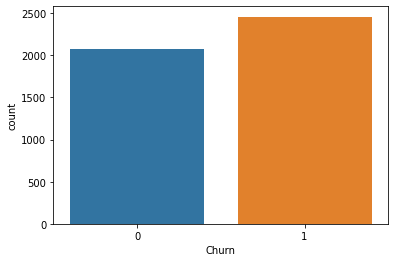

In [60]:
sns.countplot(y_train_sm)
plt.show()

In [43]:
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_sm, y_train_sm, test_size=0.2)

In [57]:
Log_reg = LogisticRegression(C=150, max_iter=160)
Log_reg.fit(X_train_sap, y_train_sap)
log_pred_sap = Log_reg.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(log_pred_sap, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred_sap, y_test_sap)}')
print(f'Classification report :\n {classification_report(log_pred_sap, y_test_sap)}')

Accuracy score : 0.9008810572687225
Confusion matrix :
 [[384  38]
 [ 52 434]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       422
           1       0.92      0.89      0.91       486

    accuracy                           0.90       908
   macro avg       0.90      0.90      0.90       908
weighted avg       0.90      0.90      0.90       908



In [44]:
#decision tree classifier
dtc_sampling = DecisionTreeClassifier(random_state = 100,max_depth=7, min_samples_leaf=15)
dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9317180616740088
Confusion matrix :
 [[406  32]
 [ 30 440]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       438
           1       0.93      0.94      0.93       470

    accuracy                           0.93       908
   macro avg       0.93      0.93      0.93       908
weighted avg       0.93      0.93      0.93       908



In [45]:
# Random forest classifier
rfc_sampling = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_leaf=10, min_samples_split=6)
rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9405286343612335
Confusion matrix :
 [[406  24]
 [ 30 448]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       430
           1       0.95      0.94      0.94       478

    accuracy                           0.94       908
   macro avg       0.94      0.94      0.94       908
weighted avg       0.94      0.94      0.94       908



In [46]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9493392070484582
Confusion matrix :
 [[409  19]
 [ 27 453]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       428
           1       0.96      0.94      0.95       480

    accuracy                           0.95       908
   macro avg       0.95      0.95      0.95       908
weighted avg       0.95      0.95      0.95       908



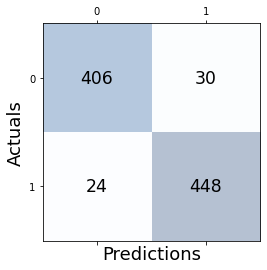

In [59]:
conf_matrix = confusion_matrix(y_true=y_test_sap, y_pred=rfc_sampling_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix', fontsize=18)
plt.show()